In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
import matplotlib.pyplot as plt
import wordcloud

In [23]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [24]:
train_data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [25]:
test_data.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


In [26]:
train_data = train_data.set_index('id')
test_data = test_data.set_index('id')

In [27]:
train_data.head(10)

,label,tweet
id,,
1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,0,Finally a transparant silicon case ^^ Thanks t...
3,0,We love this! Would you go? #talk #makememorie...
4,0,I'm wired I know I'm George I was made that wa...
5,1,What amazing service! Apple won't even talk to...
6,1,iPhone software update fucked up my phone big ...
7,0,Happy for us .. #instapic #instadaily #us #son...
8,0,New Type C charger cable #UK http://www.ebay.c...
9,0,Bout to go shopping again listening to music #...


In [28]:
test_data.head()

,tweet
id,
7921,I hate the new #iphone upgrade. Won't let me d...
7922,currently shitting my fucking pants. #apple #i...
7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
7924,My ipod is officially dead. I lost all my pict...
7925,Been fighting iTunes all night! I only want th...


In [29]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [30]:
train_data['tweet'] = train_data['tweet'].apply(lambda x: clean_text(x))

In [31]:
test_data['tweet'] = test_data['tweet'].apply(lambda x: clean_text(x))

In [32]:
train_data.head()

,label,tweet
id,,
1,0,fingerprint pregnancy test android apps beaut...
2,0,finally a transparant silicon case thanks to ...
3,0,we love this would you go talk makememories un...
4,0,im wired i know im george i was made that way ...
5,1,what amazing service apple wont even talk to m...


In [33]:
test_data.head()

,tweet
id,
7921,i hate the new iphone upgrade wont let me down...
7922,currently shitting my fucking pants apple imac...
7923,id like to puts some cdroms on my ipad is that...
7924,my ipod is officially dead i lost all my pictu...
7925,been fighting itunes all night i only want the...


In [34]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [35]:
train_data['tweet']=train_data['tweet'].apply(lambda x: remove_emoji(x))

In [36]:
test_data['tweet']=test_data['tweet'].apply(lambda x: remove_emoji(x))

In [37]:
train_data.head()

,label,tweet
id,,
1,0,fingerprint pregnancy test android apps beaut...
2,0,finally a transparant silicon case thanks to ...
3,0,we love this would you go talk makememories un...
4,0,im wired i know im george i was made that way ...
5,1,what amazing service apple wont even talk to m...


In [38]:
test_data.head()

,tweet
id,
7921,i hate the new iphone upgrade wont let me down...
7922,currently shitting my fucking pants apple imac...
7923,id like to puts some cdroms on my ipad is that...
7924,my ipod is officially dead i lost all my pictu...
7925,been fighting itunes all night i only want the...


In [39]:
tokenized_tweet_train_data = train_data['tweet'].apply(lambda x: x.split())

In [43]:
from wordcloud import WordCloud
'''word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(train_data['tweet']))
fig = plt.figure(1, figsize=(10,10))
plt.axis('off')
fig.suptitle('Word Cloud for top 50 prevelant words', fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(word_cloud)
plt.show()'''

"word_cloud = WordCloud(\n                    background_color='white',\n                    stopwords=set(STOPWORDS),\n                    max_words=50,\n                    max_font_size=40,\n                    scale=5,\n                    random_state=1).generate(str(train_data['tweet']))\nfig = plt.figure(1, figsize=(10,10))\nplt.axis('off')\nfig.suptitle('Word Cloud for top 50 prevelant words', fontsize=20)\nfig.subplots_adjust(top=2.3)\nplt.imshow(word_cloud)\nplt.show()"

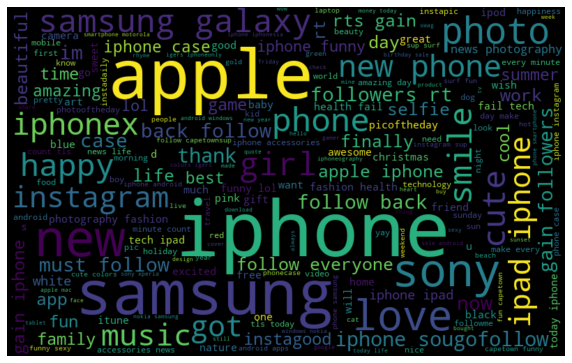

In [44]:
normal_words =' '.join([text for text in train_data['tweet'][train_data['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

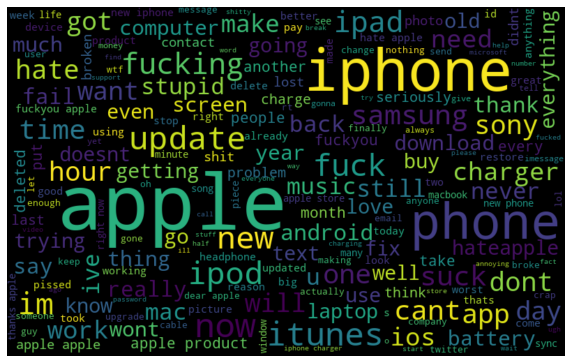

In [45]:
negative_words = ' '.join([text for text in train_data['tweet'][train_data['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow1 = bow_vectorizer.fit_transform(train_data['tweet'])
bow2 = bow_vectorizer.fit_transform(test_data['tweet'])

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf_train = tfidf_vectorizer.fit_transform(train_data['tweet'])
tfidf_test = tfidf_vectorizer.fit_transform(test_data['tweet'])

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow1, train_data['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 scor

0.7691228070175439

In [72]:
test_pred = lreg.predict_proba(bow2)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test_data['label'] = test_pred_int
submission = test_data[['label']]

submission.to_csv('sub_lreg_bow.csv', index=True) # writing data to a CSV fil
